In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
print('OpenCV version: ', cv2.__version__)

OpenCV version:  3.4.2


In [ ]:
training_image_path = './data/training_image.jpg'
test_image_path = './data/test_image.jpg'
test_video_path = './data/test_video.mp4'

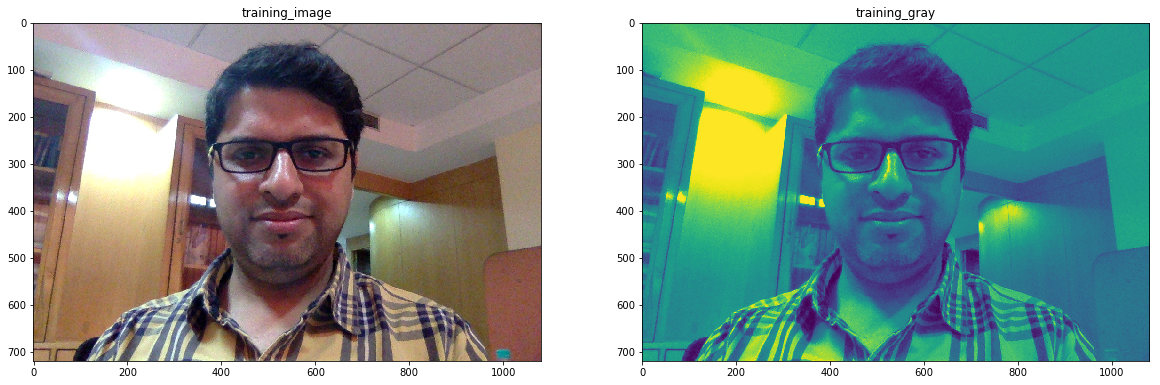

In [7]:
image = cv2.imread(training_image_path)

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title('training_image')
plt.imshow(training_image)

training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(122)
plt.title('training_gray')
plt.imshow(training_gray)

Number of keypoints detected:  188


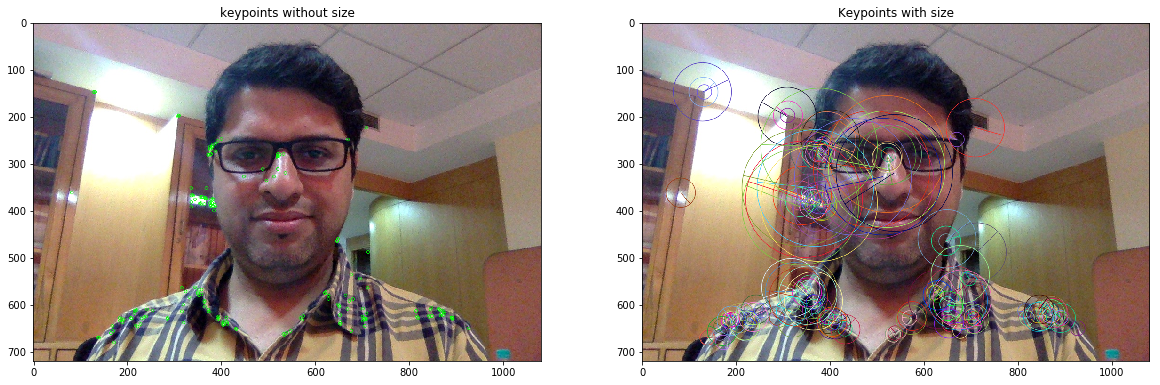

In [8]:
import copy

orb = cv2.ORB_create(200, 2.0)
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color=(0, 255, 0))
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(121)
plt.title('keypoints without size')
plt.imshow(keyp_without_size)

plt.subplot(122)
plt.title('Keypoints with size')
plt.imshow(keyp_with_size)

print('Number of keypoints detected: ', len(keypoints))

Matches:  95


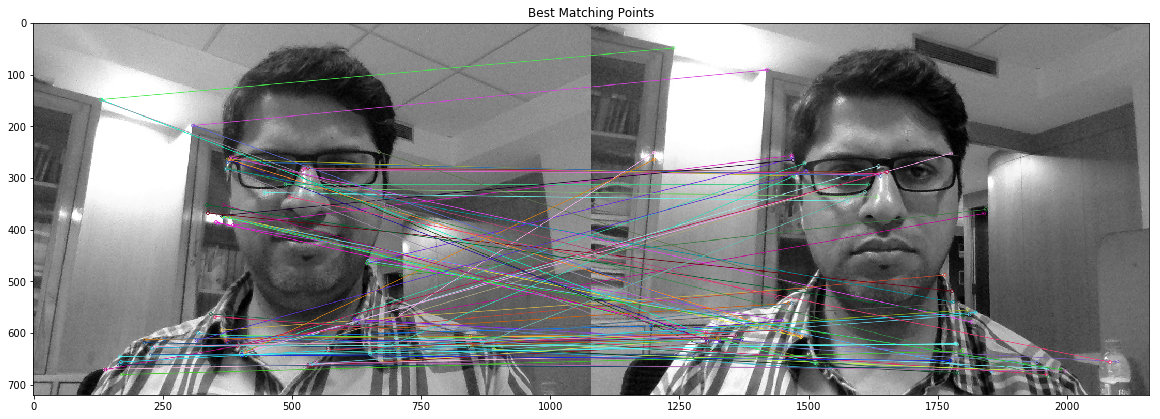

In [10]:
training_image = cv2.imread(training_image_path)
training_image = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

query_image = cv2.imread(test_image_path)
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(200, 2.0)

kp_train, des_train = orb.detectAndCompute(training_image, None)
kp_query, des_query = orb.detectAndCompute(query_image, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(des_train, des_query)
print('Matches: ',len(matches))

matches = sorted(matches, key = lambda x: x.distance)

result = cv2.drawMatches(training_image, kp_train, query_image, kp_query, matches[:200], query_image, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# To run ORB algorithm on video, run "python3 video_orb.py"